<a href="https://colab.research.google.com/github/hyunjoolee201910828/hyunjoolee201910828/blob/main/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/22_Capston/AI 모델
# !unzip -qq '/content/drive/MyDrive/22_Capston/AI 모델/archive.zip'

**vgg16**

In [ ]:
from tensorflow.keras.applications import vgg16
# resnet, inception ... 등 다양한 모델 적용해볼 예정
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

vgg_model = vgg16.VGG16(weights='imagenet')
#imagenet 가중치 가져오기 
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
# output 부분 fully-connected를 추가 ! 
# 특징을 추출해서 유사한 이미지를 찾는 것이 목적 . 
# label 예측 XXXXXXXX
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

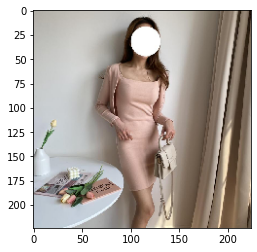

In [ ]:
img_path = '/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/'

img_width, img_height = 224, 224

most_similar = 5
# 유사한 아이템 몇개를 뽑을것인지 
files = [img_path + x for x in os.listdir(img_path) if 'jpg' in x]
  
image_1 = load_img(files[40], target_size=(img_width, img_height, 3))
# (img_width, img_height, 3) 3채널이 아닌 4채널로 나오기에 3채널로 변경
plt.imshow(image_1)
plt.show()

In [ ]:
img_array = img_to_array(image_1)
# 이미지 array 읽어오기

In [ ]:
img_batch = np.expand_dims(img_array, axis=0)
#(batch_size, img_width, img_height, channel)으로 만들기 위함
# batch_size = None이면 모델이 작동하지 않음
print('image_batch_size=',img_batch.shape)
# 4_channel -> 3_channel로 변경
processed_image = preprocess_input(img_batch)
# tf.kears.applications.[model] import preprocess_input
# 불러온 모델에 가장 잘 맞게 이미지를 맞추기위함.
processed_image

image_batch_size= (1, 224, 224, 3)


array([[[[  61.060997 ,   55.221    ,   51.32     ],
         [  63.060997 ,   57.221    ,   53.32     ],
         [  62.060997 ,   56.221    ,   52.32     ],
         ...,
         [ -13.939003 ,  -13.778999 ,   -4.6800003],
         [ -70.939    ,  -72.779    ,  -65.68     ],
         [ -98.939    , -103.779    ,  -97.68     ]],

        [[  61.060997 ,   55.221    ,   51.32     ],
         [  63.060997 ,   57.221    ,   53.32     ],
         [  62.060997 ,   56.221    ,   52.32     ],
         ...,
         [ -14.939003 ,  -14.778999 ,   -5.6800003],
         [ -88.939    ,  -90.779    ,  -83.68     ],
         [ -96.939    , -101.779    ,  -95.68     ]],

        [[  63.060997 ,   57.221    ,   53.32     ],
         [  63.060997 ,   57.221    ,   53.32     ],
         [  64.061    ,   58.221    ,   54.32     ],
         ...,
         [ -21.939003 ,  -21.779    ,  -12.68     ],
         [ -89.939    ,  -91.779    ,  -84.68     ],
         [ -93.939    ,  -98.779    ,  -92.68     ]],

In [ ]:
img_feature = model.predict(processed_image)
print('number of image features: ',img_feature.size)
img_feature

number of image features:  4096


array([[1.4109355 , 0.        , 0.98415124, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
image_list = []
for f in files:
    file_name = f
    image = load_img(file_name, target_size=(224, 224, 3))
    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    
    image_list.append(img_batch)

images = np.vstack(image_list)
# vstack -> 세로로 합치기 
# hstack -> 가로로 합치기
processed_imgs = preprocess_input(images)

img_feature = model.predict(processed_imgs)

cosine = cosine_similarity(img_feature)
#예측 값으로 유사도 구하기
cos_df = pd.DataFrame(cosine, columns=files, index=files)
#pd.DataFrame(value, columns, index)
#files = img_name
# index, column -> 이미지이름으로 하고 예측했던 값들로 value
cos_df

,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104053.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104062.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104065.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104056.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104060.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104059.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104063.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104057.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104061.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104052.jpg,...,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1053464.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1053463.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1053465.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1053454.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1061645.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1061641.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1061640.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1061642.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1061644.jpg,/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1061643.jpg
/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104053.jpg,1.000000,0.724157,0.973754,0.999223,0.801638,0.830023,0.801187,0.683258,0.746603,0.910836,...,0.477612,0.484272,0.489707,0.513683,0.548241,0.514001,0.536117,0.514868,0.500246,0.460947
/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104062.jpg,0.724157,1.000000,0.724195,0.726606,0.659526,0.681319,0.780321,0.635970,0.637351,0.665705,...,0.606882,0.599442,0.635936,0.639187,0.684998,0.651693,0.684791,0.670649,0.670945,0.649000
/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104065.jpg,0.973754,0.724195,1.000000,0.975785,0.789324,0.818124,0.794855,0.703127,0.735304,0.906784,...,0.508629,0.491666,0.502999,0.517626,0.575826,0.518020,0.544457,0.505986,0.529147,0.469721
/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104056.jpg,0.999223,0.726606,0.975785,1.000000,0.796707,0.826245,0.802457,0.682184,0.745205,0.913130,...,0.482264,0.489371,0.494347,0.514428,0.550199,0.518784,0.540759,0.517274,0.502586,0.465946
/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/104060.jpg,0.801638,0.659526,0.789324,0.796707,1.000000,0.783522,0.820060,0.726294,0.738237,0.747240,...,0.449422,0.430879,0.473102,0.559282,0.534222,0.464030,0.493945,0.466347,0.497803,0.453324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/content/drive/MyDrive/22_Capston/패션데이터_원본/Training/training_원천 데이터/섹시글램/1061641.jpg,0.514001,0.651693,0.518020,0.518784,0.464030,0.478029,0.608194,0.427700,0.478821,0.523003,...,0.545410,0.541498,0.575066,0.659101,0.593463,1.000000,0.891033,0.684205,0.

------------------------------
selected product:


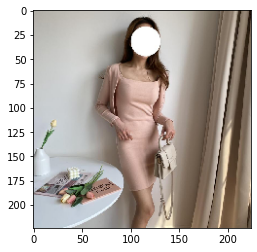

------------------------------
similar products:


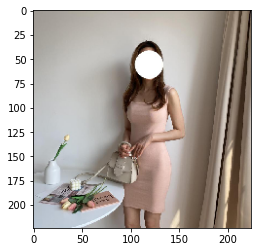

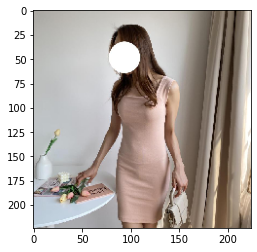

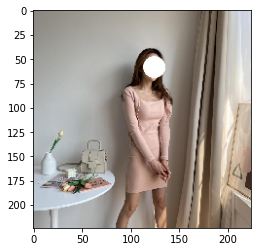

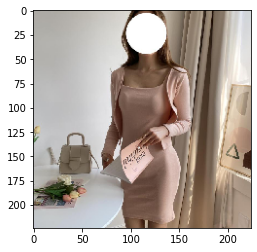

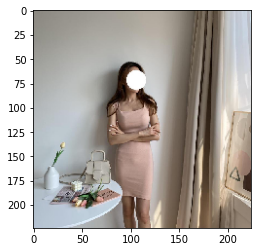

In [ ]:
def similarity_image(img):
    print('-'*30)
    print('selected product:')
    image = load_img(img, target_size=(img_width, img_height, 3))
    plt.imshow(image)
    plt.show()
    
    print('-'*30)
    print('similar products:')
    cosine_img = cos_df[img].sort_values(ascending=False)[1:most_similar+1].index
    
    cosine_img_score = cos_df[img].sort_values(ascending=False)[1:most_similar+1]
    
    for i in range(0, len(cosine_img)):
        image_cosine = load_img(cosine_img[i], target_size=(img_width, img_height, 3))
        plt.imshow(image_cosine)
        plt.show()
  
similarity_image(files[40])

image_batch_size= (1, 224, 224, 3)
------------------------------
selected product:


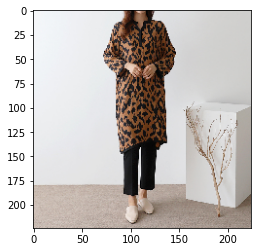

------------------------------
similar products:


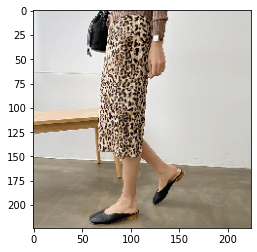

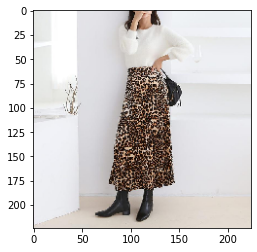

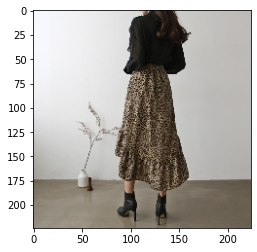

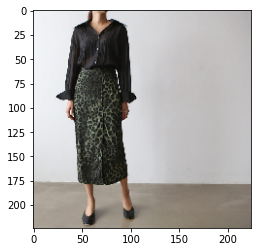

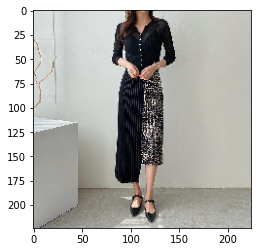

In [ ]:
#vgg 전체 코드
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

vgg_model = vgg16.VGG16(weights='imagenet')
#imagenet 가중치 가져오기 
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
img_path = '/content/drive/MyDrive/22_Capston/패션데이터_원본/Validation/원천데이터/섹시글램/'

img_width, img_height = 224, 224

most_similar = 5
# 유사한 아이템 몇개를 뽑을것인지 
files = [img_path + x for x in os.listdir(img_path) if 'jpg' in x]
  
image_1 = load_img(files[40], target_size=(img_width, img_height, 3))
# (img_width, img_height, 3) 3채널이 아닌 4채널로 나오기에 3채널로 변경
img_array = img_to_array(image_1)
# 이미지 array 읽어오기
img_batch = np.expand_dims(img_array, axis=0)
#(batch_size, img_width, img_height, channel)으로 만들기 위함
# batch_size = None이면 모델이 작동하지 않음
print('image_batch_size=',img_batch.shape)
# 4_channel -> 3_channel로 변경
processed_image = preprocess_input(img_batch)
# tf.kears.applications.[model] import preprocess_input
# 불러온 모델에 가장 잘 맞게 이미지를 맞추기위함.
img_feature = model.predict(processed_image)
image_list = []
for f in files:
    file_name = f
    image = load_img(file_name, target_size=(224, 224, 3))
    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    
    image_list.append(img_batch)

images = np.vstack(image_list)
# vstack -> 세로로 합치기 
# hstack -> 가로로 합치기
processed_imgs = preprocess_input(images)

img_feature = model.predict(processed_imgs)

cosine = cosine_similarity(img_feature)
#예측 값으로 유사도 구하기
cos_df = pd.DataFrame(cosine, columns=files, index=files)
#pd.DataFrame(value, columns, index)
#files = img_name
# index, column -> 이미지이름으로 하고 예측했던 값들로 value
def similarity_image(img):
    print('-'*30)
    print('selected product:')
    image = load_img(img, target_size=(img_width, img_height, 3))
    plt.imshow(image)
    plt.show()
    
    print('-'*30)
    print('similar products:')
    cosine_img = cos_df[img].sort_values(ascending=False)[1:most_similar+1].index
    
    cosine_img_score = cos_df[img].sort_values(ascending=False)[1:most_similar+1]
    
    for i in range(0, len(cosine_img)):
        image_cosine = load_img(cosine_img[i], target_size=(img_width, img_height, 3))
        plt.imshow(image_cosine)
        plt.show()
  
similarity_image(files[1]) #비슷한 옷을 찾고싶은 옷번호

**Resnet**

102981632/102967424 [==============================] - 0s 0us/step
image_batch_size= (1, 224, 224, 3)
------------------------------
selected product:


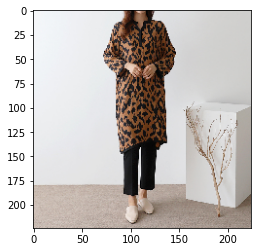

------------------------------
similar products:


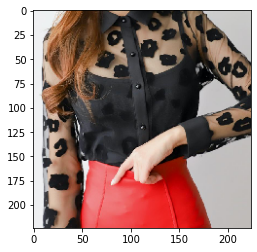

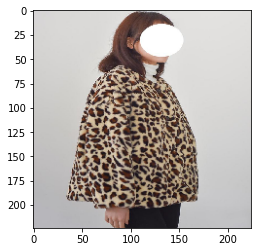

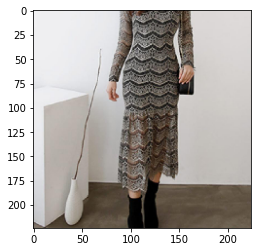

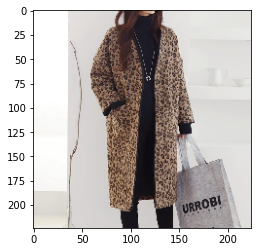

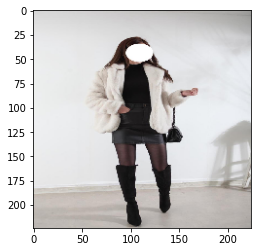

In [ ]:
#resnet 전체 코드
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

resnet_model = ResNet50(weights='imagenet')

model = Model(inputs=resnet_model.input, outputs=resnet_model.output)
img_path = '/content/drive/MyDrive/22_Capston/패션데이터_원본/Validation/원천데이터/섹시글램/'

img_width, img_height = 224, 224

most_similar = 5
# 유사한 아이템 몇개를 뽑을것인지 
files = [img_path + x for x in os.listdir(img_path) if 'jpg' in x]
  
image_1 = load_img(files[40], target_size=(img_width, img_height, 3))
# (img_width, img_height, 3) 3채널이 아닌 4채널로 나오기에 3채널로 변경
img_array = img_to_array(image_1)
# 이미지 array 읽어오기
img_batch = np.expand_dims(img_array, axis=0)
#(batch_size, img_width, img_height, channel)으로 만들기 위함
# batch_size = None이면 모델이 작동하지 않음
print('image_batch_size=',img_batch.shape)
# 4_channel -> 3_channel로 변경
processed_image = preprocess_input(img_batch)
# tf.kears.applications.[model] import preprocess_input
# 불러온 모델에 가장 잘 맞게 이미지를 맞추기위함.
img_feature = model.predict(processed_image)
image_list = []
for f in files:
    file_name = f
    image = load_img(file_name, target_size=(224, 224, 3))
    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    
    image_list.append(img_batch)

images = np.vstack(image_list)
# vstack -> 세로로 합치기 
# hstack -> 가로로 합치기
processed_imgs = preprocess_input(images)

img_feature = model.predict(processed_imgs)

cosine = cosine_similarity(img_feature)
#예측 값으로 유사도 구하기
cos_df = pd.DataFrame(cosine, columns=files, index=files)
#pd.DataFrame(value, columns, index)
#files = img_name
# index, column -> 이미지이름으로 하고 예측했던 값들로 value
def similarity_image(img):
    print('-'*30)
    print('selected product:')
    image = load_img(img, target_size=(img_width, img_height, 3))
    plt.imshow(image)
    plt.show()
    
    print('-'*30)
    print('similar products:')
    cosine_img = cos_df[img].sort_values(ascending=False)[1:most_similar+1].index
    
    cosine_img_score = cos_df[img].sort_values(ascending=False)[1:most_similar+1]
    
    for i in range(0, len(cosine_img)):
        image_cosine = load_img(cosine_img[i], target_size=(img_width, img_height, 3))
        plt.imshow(image_cosine)
        plt.show()
  
similarity_image(files[1])

vggnet이 상하의 두벌일때는 인식이 더 잘됨. 똑같은게 아니라 유사한걸 찾으려면 resnet이 나을지도.
validation data로



배경만 없애는걸로. 옷 하나씩 선택 안하고 사진 하나로 나오는걸로

옷에 따라 모델 성능이 다름

------------------------------
selected product:


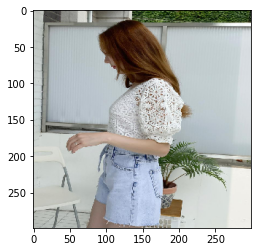

------------------------------
similar products:


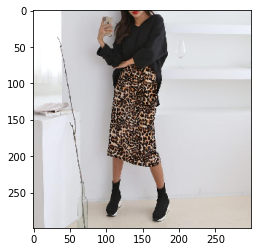

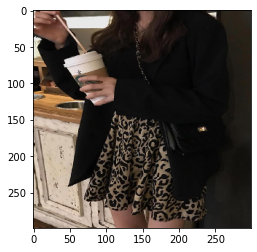

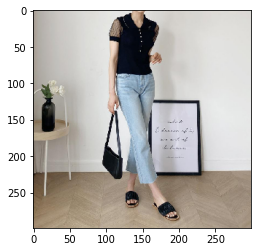

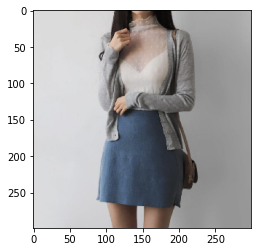

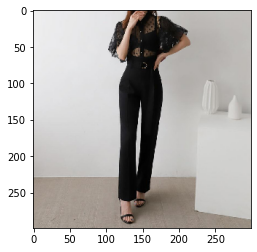

In [18]:
#inceptionv3 전체 코드
import torch
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
import tensorflow as tf

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import natsort ## 숫자 정렬용 라이브러리

inception_model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet')
model = Model(inputs=inception_model.input, outputs=inception_model.output)
img_path = '/content/drive/MyDrive/22_Capston/패션데이터_최종/Validation/섹시글램/'

img_width, img_height = 299, 299
most_similar = 5

list1 = natsort.natsorted(os.listdir(img_path))
files = [img_path + x for x in os.listdir(img_path) if 'jpg' in x]

image_list = []

for f in files:
    file_name = f
    image = load_img(file_name, target_size=(299, 299, 3))
    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    
    image_list.append(img_batch)

images = np.vstack(image_list)
processed_imgs = preprocess_input(images)
img_feature = model.predict(processed_imgs)

cosine = cosine_similarity(img_feature)
cos_df = pd.DataFrame(cosine, columns=files, index=files)

def similarity_image(img):
    print('-'*30)
    print('selected product:')
    image = load_img(img, target_size=(img_width, img_height, 3))
    plt.imshow(image)
    plt.show()
    
    print('-'*30)
    print('similar products:')
    cosine_img = cos_df[img].sort_values(ascending=False)[1:most_similar+1].index
    
    cosine_img_score = cos_df[img].sort_values(ascending=False)[1:most_similar+1]
    
    for i in range(0, len(cosine_img)):
        image_cosine = load_img(cosine_img[i], target_size=(img_width, img_height, 3))
        plt.imshow(image_cosine)
        plt.show()

similarity_image(files[7])

Virtual devices cannot be modified after being initialized
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 

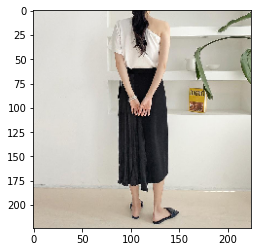

------------------------------
similar products:


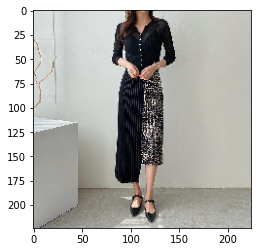

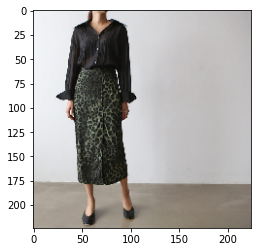

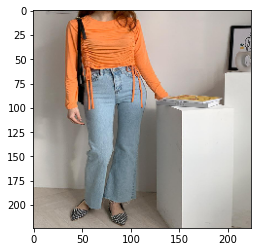

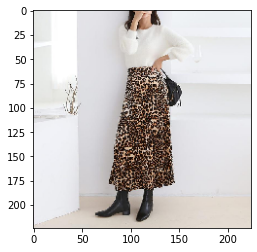

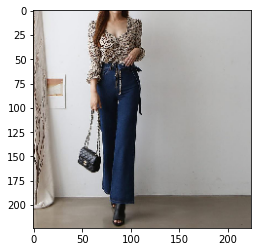

In [52]:
# vgg코드(사진 전처리 후)
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU에 6GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], 
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6144)])
    except RuntimeError as e:
        print(e)

vgg_model = vgg16.VGG16(weights='imagenet')

model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
model.summary()

img_path = '/content/drive/MyDrive/22_Capston/패션데이터_최종/Validation/섹시글램/'
img_width, img_height = 224, 224
most_similar = 5
list1 = natsort.natsorted(os.listdir(img_path))
files = [img_path + x for x in list1 if 'jpg' in x]

print(files)
image_list = []
for f in files:
    file_name = f
    image = load_img(file_name, target_size=(224, 224, 3))
    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    
    image_list.append(img_batch)

images = np.vstack(image_list)
processed_imgs = preprocess_input(images)
img_feature = model.predict(processed_imgs)

cosine = cosine_similarity(img_feature)
cos_df = pd.DataFrame(cosine, columns=files, index=files)

def similarity_image(img):
    print('-'*30)
    print('selected product:')
    image = load_img(img, target_size=(img_width, img_height, 3))
    plt.imshow(image)
    plt.show()
    
    print('-'*30)
    print('similar products:')
    cosine_img = cos_df[img].sort_values(ascending=False)[1:most_similar+1].index
    
    cosine_img_score = cos_df[img].sort_values(ascending=False)[1:most_similar+1]
    
    for i in range(0, len(cosine_img)):
        image_cosine = load_img(cosine_img[i], target_size=(img_width, img_height, 3))
        plt.imshow(image_cosine)
        plt.show()

similarity_image(files[0])

Virtual devices cannot be modified after being initialized
------------------------------
selected product:


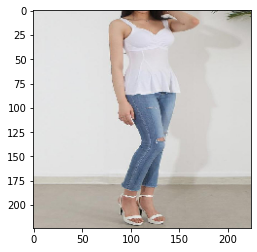

------------------------------
similar products:


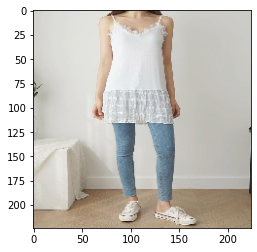

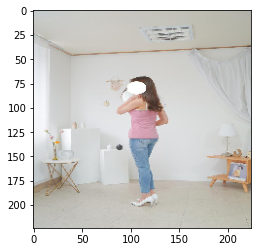

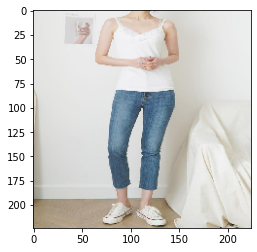

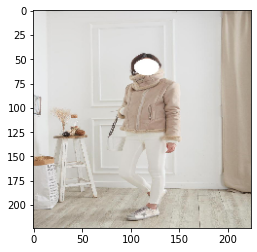

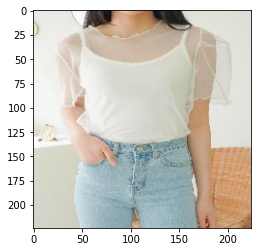

FileNotFoundError: ignored

In [44]:
# vgg코드(사진 전처리 후, 상세 모델 코드, 모델 pt 파일 저장)
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import torch
import natsort
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU에 6GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], 
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10000000)])
    except RuntimeError as e:
        print(e)
model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=2),
    
    layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=2),
    
    layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=2),
    
    layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=2),
    
    layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=2),
    
    layers.Flatten(),
    layers.Dense(4096),
    layers.Dropout(0.5),
    layers.Dense(4096),
    layers.Dropout(0.5),
    layers.Dense(1000, activation='softmax')
], name='VGG-16')

img_path = '/content/drive/MyDrive/22_Capston/패션데이터_최종/Validation/섹시글램/'
img_width, img_height = 224, 224
most_similar = 5

list1 = natsort.natsorted(os.listdir(img_path))
files = [img_path + x for x in list1 if 'jpg' in x]


image_list = []
for f in files:
    file_name = f
    print(f)
    image = load_img(file_name, target_size=(224, 224, 3))
    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    
    image_list.append(img_batch)

images = np.vstack(image_list)
processed_imgs = preprocess_input(images)
img_feature = model.predict(processed_imgs)

cosine = cosine_similarity(img_feature)
cos_df = pd.DataFrame(cosine, columns=files, index=files)

def similarity_image(img):
    print('-'*30)
    print('selected product:')
    image = load_img(img, target_size=(img_width, img_height, 3))
    plt.imshow(image)
    plt.show()
    
    print('-'*30)
    print('similar products:')
    cosine_img = cos_df[img].sort_values(ascending=False)[1:most_similar+1].index
    
    cosine_img_score = cos_df[img].sort_values(ascending=False)[1:most_similar+1]
    
    for i in range(0, len(cosine_img)):
        image_cosine = load_img(cosine_img[i], target_size=(img_width, img_height, 3))
        plt.imshow(image_cosine)
        plt.show()

similarity_image(files[5])

torch.save(model, f'./model.pt')

vgg가 확실히 더 비슷한 느낌임

------------------------------
selected product:


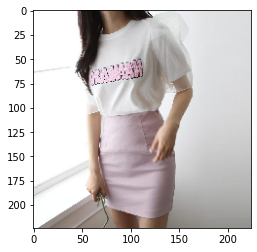

------------------------------
similar products:


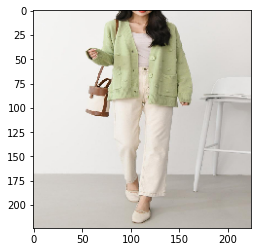

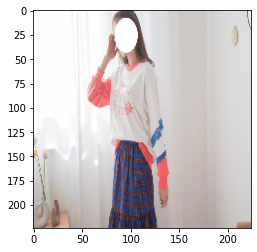

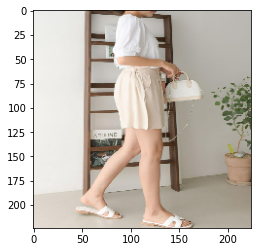

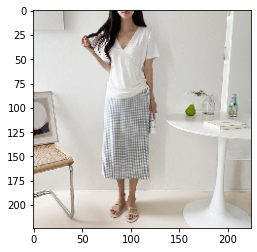

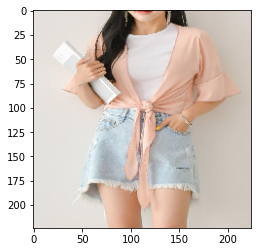

In [53]:
#모델 저장한걸로 불러서 쓰기
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import torch
import natsort
device = "cuda" if torch.cuda.is_available() else "cpu"
model1 = torch.load("model.pt", map_location=device)
img_path = '/content/drive/MyDrive/22_Capston/패션데이터_최종/Validation/유니크/'
img_width, img_height = 224, 224
most_similar = 5

list1 = natsort.natsorted(os.listdir(img_path))
files = [img_path + x for x in list1 if 'jpg' in x]

image_list = []
for f in files:
    file_name = f
    image = load_img(file_name, target_size=(224, 224, 3))
    img_array = img_to_array(image)
    img_batch = np.expand_dims(img_array, axis=0)
    
    image_list.append(img_batch)

images = np.vstack(image_list)
processed_imgs = preprocess_input(images)
img_feature = model1.predict(processed_imgs)

cosine = cosine_similarity(img_feature)
cos_df = pd.DataFrame(cosine, columns=files, index=files)

def similarity_image(img):
    print('-'*30)
    print('selected product:')
    image = load_img(img, target_size=(img_width, img_height, 3))
    plt.imshow(image)
    plt.show()
    
    print('-'*30)
    print('similar products:')
    cosine_img = cos_df[img].sort_values(ascending=False)[1:most_similar+1].index
    
    cosine_img_score = cos_df[img].sort_values(ascending=False)[1:most_similar+1]
    
    for i in range(0, len(cosine_img)):
        image_cosine = load_img(cosine_img[i], target_size=(img_width, img_height, 3))
        plt.imshow(image_cosine)
        plt.show()

similarity_image(files[10])

In [45]:
pwd

'/content'